Download the dataset from the following link:

https://www.kaggle.com/datasets/krantiswalke/bank-personal-loan-modelling



Create a NN using PyTorch and Keras and compare the final results. You may also use the vanilla NN that you built in AI course and compare the final results.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("Bank_Personal_Loan_Modelling.csv")

In [4]:
data.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [6]:
data.corr()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
ID,1.000000,-0.008473,-0.008326,-0.017695,0.013432,-0.016797,-0.024675,0.021463,-0.013920,-0.024801,-0.016972,-0.006909,-0.002528,0.017028
Age,-0.008473,1.000000,0.994215,-0.055269,-0.029216,-0.046418,-0.052012,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,-0.008326,0.994215,1.000000,-0.046574,-0.028626,-0.052563,-0.050077,0.013152,-0.010582,-0.007413,-0.001232,0.010353,0.013898,0.008967
Income,-0.017695,-0.055269,-0.046574,1.000000,-0.016410,-0.157501,0.645984,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
ZIP Code,0.013432,-0.029216,-0.028626,-0.016410,1.000000,0.011778,-0.004061,-0.017377,0.007383,0.000107,0.004704,0.019972,0.016990,0.007691
Family,-0.016797,-0.046418,-0.052563,-0.157501,0.011778,1.000000,-0.109275,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.024675,-0.052012,-0.050077,0.645984,-0.004061,-0.109275,1.000000,-0.136124,0.109905,0.366889,0.015086,0.136534,-0.003611,-0.006689
Education,0.021463,0.041334,0.013152,-0.187524,-0.017377,0.064929,-0.136124,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.013920,-0.012539,-0.010582,0.206806,0.007383,-0.020445,0.109905,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
Personal Loan,-0.024801,-0.007726,-0.007413,0.502462,0.000107,0.061367,0.366889,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802


In [7]:
data = data.drop(['ID', 'ZIP Code'], axis=1)

In [8]:
x = data.iloc[:, [0, 1, 2, 3, 4, 5, 6, 8, 9, 10, 11]]
y = data.iloc[:, 7]

In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)

<h3>PyTorch</h3>

In [10]:
import torch
import torchvision
from torchvision import transforms

/opt/homebrew/Caskroom/miniconda/base/envs/CPU/lib/python3.8/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: dlopen(/opt/homebrew/Caskroom/miniconda/base/envs/CPU/lib/python3.8/site-packages/torchvision/image.so, 0x0006): Symbol not found: __ZN2at4_ops19empty_memory_format4callEN3c108ArrayRefIxEENS2_8optionalINS2_10ScalarTypeEEENS5_INS2_6LayoutEEENS5_INS2_6DeviceEEENS5_IbEENS5_INS2_12MemoryFormatEEE
  Referenced from: <320D718F-E2FD-3687-B2F0-E83CF97743B1> /opt/homebrew/Caskroom/miniconda/base/envs/CPU/lib/python3.8/site-packages/torchvision/image.so
  Expected in:     <EF59E044-2498-3CB6-AAE1-EEA304AC32DE> /opt/homebrew/Caskroom/miniconda/base/envs/CPU/lib/python3.8/site-packages/torch/lib/libtorch_cpu.dylib
  warn(f"Failed to load image Python extension: {e}")


In [11]:
train = torch.utils.data.TensorDataset(torch.Tensor(x_train), torch.LongTensor(y_train))

test = torch.utils.data.TensorDataset(torch.Tensor(x_test), torch.Tensor(y_test))

In [12]:
trainset = torch.utils.data.DataLoader(train, batch_size=10, shuffle=True)

testset = torch.utils.data.DataLoader(test, batch_size=10, shuffle=True)

In [13]:
# Create the Neural Network in PyTorch

import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.fc1 = nn.Linear(11, 30)
        self.fc2 = nn.Linear(30, 30)
        self.fc3 = nn.Linear(30, 30)
        self.fc4 = nn.Linear(30, 2)
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        
        return F.log_softmax(self.fc4(x), dim=1)

net = Net()
print(net)

Net(
  (fc1): Linear(in_features=11, out_features=30, bias=True)
  (fc2): Linear(in_features=30, out_features=30, bias=True)
  (fc3): Linear(in_features=30, out_features=30, bias=True)
  (fc4): Linear(in_features=30, out_features=2, bias=True)
)


In [14]:
# Check the Neural Net's 'forward()' Method

x = torch.rand([1, 11])
output = net.forward(x)
output

tensor([[-0.7076, -0.6789]], grad_fn=<LogSoftmaxBackward0>)

In [15]:
print(x)

tensor([[0.6291, 0.9016, 0.9903, 0.5428, 0.3750, 0.1048, 0.0296, 0.3702, 0.5413,
         0.3128, 0.9118]])


In [16]:
def CheckAccuracy():
    correct = 0
    total = 0
    
    with torch.no_grad():
        for data in testset:
            X, y = data
            output = net(X)
            
            for idx, i in enumerate(output):
                if torch.argmax(i) == y[idx]:
                    correct += 1
                total += 1
    
    return round(correct/total, 3)

In [17]:
# Training the Neural Network

import torch.optim as optim
optimizer = optim.Adam(net.parameters(), lr=0.001)

EPOCHS = 5
accu_per_epoch = []
loss_per_epoch = []

total = 0
correct = 0

for epoch in range(EPOCHS):
    for data in trainset:
        net.zero_grad()
        
        X, y = data
        output = net(X)
        
        loss = F.nll_loss(output, y)
        loss.backward()
        
        optimizer.step()
    
    accu = CheckAccuracy()
    
    # Verbose
    
    print(f"Epoch: {epoch + 1} | Loss = {loss}, Accuracy = {accu}")
    # For Graphs
    accu_per_epoch.append(accu)
    loss_per_epoch.append(loss)
            

Epoch: 1 | Loss = 0.07439699023962021, Accuracy = 0.935
Epoch: 2 | Loss = 0.009786853566765785, Accuracy = 0.974
Epoch: 3 | Loss = 0.002955930307507515, Accuracy = 0.972
Epoch: 4 | Loss = 0.009999320842325687, Accuracy = 0.974
Epoch: 5 | Loss = 0.014557887800037861, Accuracy = 0.975


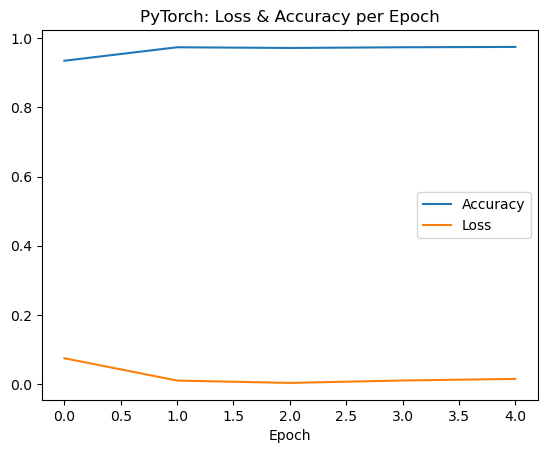

In [18]:
# Plots

loss_per_epoch = [float(x) for x in loss_per_epoch]
plt.plot(range(len(accu_per_epoch)), accu_per_epoch, label="Accuracy")
plt.plot(range(len(loss_per_epoch)), loss_per_epoch, label="Loss")

plt.title("PyTorch: Loss & Accuracy per Epoch")
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [19]:
# Model Accuracy Evaluation

py_test_acc = CheckAccuracy()
print(f'Test accuracy: {py_test_acc:.3f}')

Test accuracy: 0.975


<h3>TensorFlow</h3>

In [20]:
import tensorflow as tf

# Neural Network Creation
model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(30, activation='relu', input_shape=(11,)),
  tf.keras.layers.Dense(30, activation='relu'),
  tf.keras.layers.Dense(30, activation='relu'),
  tf.keras.layers.Dense(2, activation='softmax')
])


# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [21]:
# Model Training
history = model.fit(x_train, y_train, epochs=5, batch_size=10, verbose=1)

Epoch 1/5


2023-05-11 08:31:08.142994: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


400/400 [==============================] - 0s 390us/step - loss: 0.2018 - accuracy: 0.9225
Epoch 2/5
400/400 [==============================] - 0s 371us/step - loss: 0.0855 - accuracy: 0.9707
Epoch 3/5
400/400 [==============================] - 0s 370us/step - loss: 0.0678 - accuracy: 0.9732
Epoch 4/5
400/400 [==============================] - 0s 384us/step - loss: 0.0591 - accuracy: 0.9768
Epoch 5/5
400/400 [==============================] - 0s 415us/step - loss: 0.0522 - accuracy: 0.9818


In [22]:
# Model Accuracy Evaluation

tf_test_loss, tf_test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f'Test loss: {tf_test_loss:.3f}, Test accuracy: {tf_test_acc:.3f}')

Test loss: 0.101, Test accuracy: 0.976


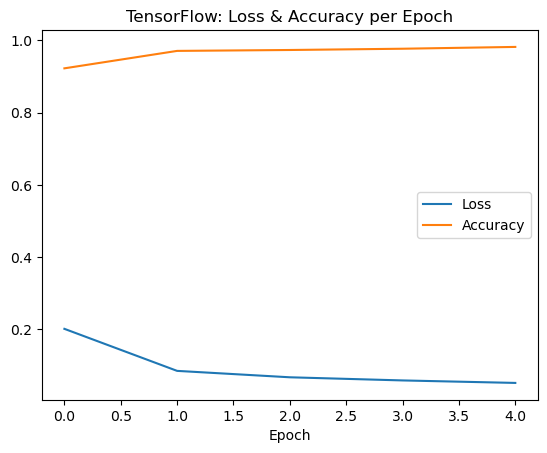

In [23]:
# Graphs - Loss & Accuracy for each Epoch

plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['accuracy'], label='Accuracy')

plt.title("TensorFlow: Loss & Accuracy per Epoch")
plt.xlabel('Epoch')
plt.legend()
plt.show()

<h4>*** After 5 Epochs ***</h4>

In [24]:
print("PyTorch Accuracy:\t", py_test_acc)
print("TensorFlow Accuracy:\t", round(tf_test_acc, 3))

PyTorch Accuracy:	 0.975
TensorFlow Accuracy:	 0.976


<h3><u>PyTorch v/s TensorFlow Comparison:</u></h3>

<p>PyTorch is FASTER in execution time, and
    
PyTorch gives almost EQUAL Testing Accuracy as TensorFlow. Note, this is a small dataset.</p>

<h3>ANN from Scratch</h3>

In [25]:
def relu(x):
    return np.maximum(0, x)

def softmax(x):
    exp_x = np.exp(x)
    return exp_x / np.sum(exp_x, axis=1, keepdims=True)

def cross_entropy_loss(y_true, y_pred):
    m = y_true.shape[0]
    p = softmax(y_pred)
    
    log_likelihood = -np.log(p[range(m),y_true])
    loss = np.sum(log_likelihood) / m
    
    return loss

def accuracy(y_true, y_pred):
    
    pred_labels = np.argmax(y_pred, axis=1)
    true_labels = y_true
    
    return np.sum(pred_labels == true_labels) / true_labels.shape[0]

In [26]:
input_dim = x_train.shape[1]
hidden_dim = 30
output_dim = 2
learning_rate = 0.001
epochs = 500


class NeuralNetwork:

    def __init__(self, input_dim, hidden_dim, output_dim, learning_rate):
        self.W1 = np.random.randn(input_dim, hidden_dim) / np.sqrt(input_dim)
        self.b1 = np.zeros((1, hidden_dim))

        self.W2 = np.random.randn(hidden_dim, hidden_dim) / np.sqrt(hidden_dim)
        self.b2 = np.zeros((1, hidden_dim))

        self.W3 = np.random.randn(hidden_dim, hidden_dim) / np.sqrt(hidden_dim)
        self.b3 = np.zeros((1, hidden_dim))

        self.W4 = np.random.randn(hidden_dim, output_dim) / np.sqrt(hidden_dim)
        self.b4 = np.zeros((1, output_dim))

        self.learning_rate = learning_rate

    def forward(self, x):
        self.z1 = np.dot(x, self.W1) + self.b1
        self.a1 = relu(self.z1)

        self.z2 = np.dot(self.a1, self.W2) + self.b2
        self.a2 = relu(self.z2)

        self.z3 = np.dot(self.a2, self.W3) + self.b3
        self.a3 = relu(self.z3)

        self.z4 = np.dot(self.a3, self.W4) + self.b4
        self.output = softmax(self.z4)

        return self.output

    def backward(self, x, y_true, y_pred):
        m = y_true.shape[0]

        d_output = y_pred
        d_output[range(m), y_true] -= 1
        d_output /= m

        d_z4 = d_output

        d_a3 = np.dot(d_z4, self.W4.T)
        d_z3 = d_a3 * (self.a3 > 0)

        d_a2 = np.dot(d_z3, self.W3.T)
        d_z2 = d_a2 * (self.a2 > 0)

        d_a1 = np.dot(d_z2, self.W2.T)
        d_z1 = d_a1 * (self.a1 > 0)

        d_W4 = np.dot(self.a3.T, d_z4)
        d_b4 = np.sum(d_z4, axis=0, keepdims=True)

        d_W3 = np.dot(self.a2.T, d_z3)
        d_b3 = np.sum(d_z3, axis=0, keepdims=True)

        d_W2 = np.dot(self.a1.T, d_z2)
        d_b2 = np.sum(d_z2, axis=0, keepdims=True)

        d_W1 = np.dot(x.T, d_z1)
        d_b1 = np.sum(d_z1, axis=0, keepdims=True)

        self.W4 -= self.learning_rate * d_W4
        self.b4 -= self.learning_rate * d_b4

        self.W3 -= self.learning_rate * d_W3
        self.b3 -= self.learning_rate * d_b3

        self.W2 -= self.learning_rate * d_W2
        self.b2 -= self.learning_rate * d_b2

        self.W1 -= self.learning_rate * d_W1
        self.b1 -= self.learning_rate * d_b1

    def train(self, x_train, y_train, epochs):
        
        losses = []
        accuracies = []
        
        for i in range(epochs+1):
            y_pred = self.forward(x_train)
            loss = cross_entropy_loss(y_train, y_pred)
            acc = accuracy(y_train, y_pred)
            
            losses.append(loss)
            accuracies.append(acc)
            
            self.backward(x_train, y_train, y_pred)
            if i % 100 == 0:
                print("Epoch %d - Loss: %.5f, Accuracy: %.5f" % (i, loss, acc))
        return losses, accuracies

In [27]:
nn = NeuralNetwork(input_dim, hidden_dim, output_dim, learning_rate)
losses, accuracies = nn.train(x_train, y_train, epochs)

Epoch 0 - Loss: 0.59290, Accuracy: 0.90275
Epoch 100 - Loss: 0.56931, Accuracy: 0.90500
Epoch 200 - Loss: 0.55137, Accuracy: 0.90500
Epoch 300 - Loss: 0.53740, Accuracy: 0.90500
Epoch 400 - Loss: 0.52623, Accuracy: 0.90500
Epoch 500 - Loss: 0.51709, Accuracy: 0.90500


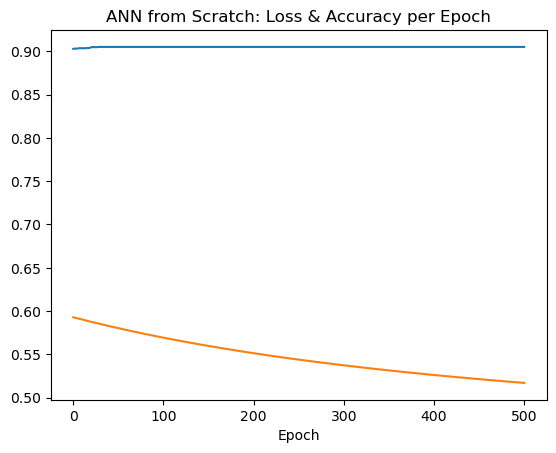

In [28]:
plt.plot(accuracies, label="Accuracy")
plt.plot(losses, label="Loss")

plt.title('ANN from Scratch: Loss & Accuracy per Epoch')
plt.xlabel('Epoch')
plt.show()

In [30]:
y_pred_test = nn.forward(x_test)
ann_test_acc = accuracy(y_test, y_pred_test)
print("Test Accuracy: %.5f" % ann_test_acc)

Test Accuracy: 0.90000


<h3>PyTorch & TensorFlow v/s ANN from Scratch Comparison</h3>

<p>
It takes many more epochs to get a decent accuracy. It is still lower than PyTorch & TensorFlow. Currently, the neural network is using gradient descent as an optimizer. Using a different optimizer such as Adam may help the neural network converge faster.
</p>

<h4> *** After 5 Epochs *** </h4>
<p> Accuracy: &lt 0.25 </p>

<h4> *** After 500 Epochs *** </h4>

In [31]:
print("ANN Accuracy:\t", ann_test_acc)

ANN Accuracy:	 0.9


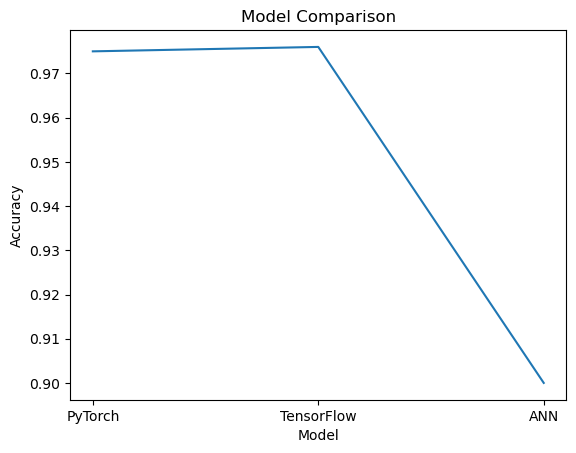

In [32]:
import matplotlib.pyplot as plt

accuracies = [py_test_acc, tf_test_acc, ann_test_acc]

plt.plot(["PyTorch", "TensorFlow", "ANN"], accuracies)

plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.title("Model Comparison")
plt.show()